(app:qm-ideal-gas)=
# Ideal Fermi/Bose Gases

## Thermodynamics of Ideal Fermi Gases

In a statistical mechanics course, you learn that the following relations for an ideal Fermi gas {cite}`Pathria2021`:

$$
\frac{PV}{kTN} = \frac{f_{5/2}(z)}{f_{3/2}(z)}
$$

$$
\frac{C_V}{N k} = \frac{15}{4} \frac{f_{5/2}(z)}{f_{3/2}(z)} - \frac{9}{4} \frac{f_{3/2}(z)}{f_{1/2}(z)}
$$

where $P$, $V$, $T$, $N$ and $C_V$ are usual thermodynamic quantities and $k$ the Bolzmann constant. The fugacity $z=e^{\mu/kT}$ takes values: $0 \le z < \infty$.  We are particularly interested in the case of very large $z$ (low temperatue limit).
The function $f_\nu(z)$, known as the Fermi-Dirac function or the Fermi-Dirac integral, is defined by

$$
f_\nu(z) = \frac{1}{\Gamma(\nu)} \int_0^\infty \frac{x^{\nu-1}}{z^{-1} e^{x}+1} \, dx
$$

where $\Gamma(\nu)$ is the Gamma function.

No closed form expression of the Fermi-Dirac function is available except for $\nu=0$.   The integral can be expanded in a power series of $z$ as

$$
f_\nu(z) = z - \frac{z^2}{2^\nu} + \frac{z^3}{3^\nu} - \cdots  = -\text{Li}_\nu(-z)
$$(eq_polylog)

where $Li_\nu(z) = z + \frac{z^2}{2^\nu} + \frac{z^3}{3^\nu} + \cdots$ is called the polylogarithm function. Since the Fermi-Dirac integral is mathematically equivalent to the the polylogarithm function, some textbooks use the latter.{cite}`Blundell2009`  A good algorithm to compute the polylogarithm function has been developed and implemented in various mathematical packages.  In practice, it is no longer necessary to evaluate the Fermi-Dirac integral.  However, it is a good exercise of imploper integrals.  

When an exact solutions is not available, physicists turn to approximated solutions.  It is common to consider some limiting cases such as $z \rightarrow 0$ and $z \rightarrow \infty$, or special cases where analysical solution is possible ($z=1$ in the current problem). Truncation of the series expansion {eq}`eq_polylog` provides an approximation for $z \ll 1$.  For large $z$, we have the asymptotic expansion:  

$$
f_\nu(z) = \frac{\xi^\nu}{\Gamma(\nu+1)} \left[1 + \nu(\nu-1) \frac{\pi^2}{6} \xi^{-2} + \nu(\nu-1)(\nu-2)(\nu-3) \frac{7\pi^4}{360} \xi^{-4} + \cdots \right]
$$

where $\xi = \ln z$.  For intermediate values of $z$, we need to evaluate the integral numerically.  At $z=1$, the Fermi-Dirack integral can be expressed as $f_\mu(1)=(1-2^{1-\mu})\zeta(\mu)$ where $\zeta(\mu)$ is the Riemann zeta function which we are already familar with.  The accuracy of the neumerical method can be checked with this special value.

Since the upper limit of integration is infinity, the integral is improper.  Furthermore, $f_{1/2}(z)$  the integrand has a singularity of $\frac{1}{\sqrt{x}}$.  Hence, the evaluation of $f_{1/2}(z)$ is harder than $f_{3/2}(z)$ and $f_{5/2}(z)$.

### $f_{3/2}$ and $f_{5/2}$

Let us begin with the easier ones. The integral bounds suggest the Gauss-Laguerre quadrature.  Explicitely writing the integral

$$
\begin{eqnarray}
f_{3/2}(z) &=& \frac{2 z}{\sqrt{\pi}} \int_0^\infty \frac{\sqrt{x}}{1+z e^{-x}} e^{-x}\, dx \\
f_{5/2}(z) &=& \frac{4 z}{\sqrt{3\pi}} \int_0^\infty \frac{x\sqrt{x}}{1+z e^{-x}} e^{-x}\, dx
\end{eqnarray}
$$

We compute them using 10 points Gauss-Laguerre quadrature and compare the results with the 2nd order power expansion for $z \ll 1$ and the the second order asymptotic expansion for $z\gg 1$.

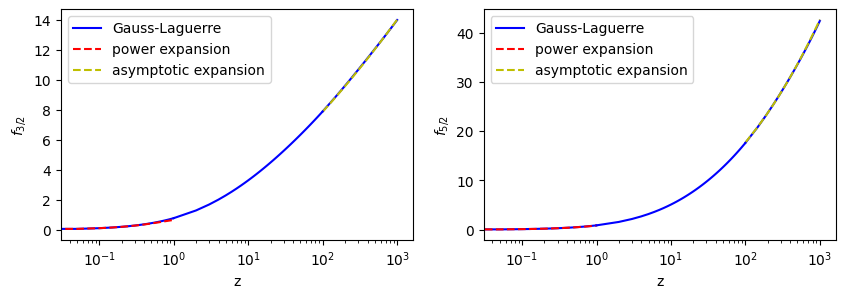

In [1]:
import numpy as np

# Generate abscissas and weights
from sympy import symbols, poly, laguerre

# 10 points Gauss-Laguerre
NG = 10

x = symbols("x")
roots = poly(laguerre(NG, x)).all_roots()

# abscissas and weights are saved as numpy ndarray
x = np.array([r.evalf(20) for r in roots],dtype=float)
w = np.array([(r / ((NG + 1) * laguerre(NG + 1, r)) ** 2).evalf(20)\
              for r in roots],dtype=float)

nu32=3./2.
nu52=5./2.
N=20

# For 0 < z < 1
z_small=np.linspace(0,1,N+1)


from scipy.special import gamma 

f52_small_z=np.zeros(N+1)
f32_small_z=np.zeros(N+1)

# no need to compute for z=0.
f52_small_z[0]=0
f32_small_z[0]=0

for k in range(1,N+1):
    f52_small_z[k]=(w*x**(nu52-1)/(1+z_small[k]*np.exp(-x))).sum() \
        *z_small[k]/gamma(nu52)
    f32_small_z[k]=(w*x**(nu32-1)/(1+z_small[k]*np.exp(-x))).sum() \
        *z_small[k]/gamma(nu32)
    
f52_ps = z_small - z_small**2/2**nu52
f32_ps = z_small - z_small**2/2**nu32

# For 1000 > z > 100
z_large=np.linspace(100,1000,N+1)

f52_large_z=np.zeros(N+1)
f32_large_z=np.zeros(N+1)

for k in range(0,N+1):
    f52_large_z[k]=(w*x**(nu52-1)/(1+z_large[k]*np.exp(-x))).sum() \
        *z_large[k]/gamma(nu52)
    f32_large_z[k]=(w*x**(nu32-1)/(1+z_large[k]*np.exp(-x))).sum() \
        *z_large[k]/gamma(nu32)

xi = np.log(z_large)
f52_as = xi**nu52/gamma(nu52+1)*(1 + nu52*(nu52-1)*np.pi**2/6./xi**2 )
f32_as = xi**nu32/gamma(nu32+1)*(1 + nu32*(nu32-1)*np.pi**2/6./xi**2 )

# For 100>z>1

N=100
z_med=np.linspace(1,100,N+1)

f52_med_z=np.zeros(N+1)
f32_med_z=np.zeros(N+1)

for k in range(0,N+1):
    f52_med_z[k]=(w*x**(nu52-1)/(1+z_med[k]*np.exp(-x))).sum()\
        *z_med[k]/gamma(nu52)
    f32_med_z[k]=(w*x**(nu32-1)/(1+z_med[k]*np.exp(-x))).sum()\
        *z_med[k]/gamma(nu32)

import matplotlib.pyplot as plt
plt.ioff()
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.semilogx(z_small,f32_small_z,"-b",label="Gauss-Laguerre")
plt.semilogx(z_small,f32_ps,"--r",label="power expansion")
plt.semilogx(z_large,f32_large_z,"-b")
plt.semilogx(z_large,f32_as,"--y",label="asymptotic expansion")
plt.semilogx(z_med,f32_med_z,"-b")
plt.legend(loc=0)
plt.ylabel(r"$f_{3/2}$")
plt.xlabel("z")

plt.subplot(1,2,2)
plt.semilogx(z_small,f52_small_z,"-b",label="Gauss-Laguerre")
plt.semilogx(z_small,f52_ps,"--r",label="power expansion")
plt.semilogx(z_large,f52_large_z,"-b")
plt.semilogx(z_large,f52_as,"--y",label="asymptotic expansion")
plt.semilogx(z_med,f52_med_z,"-b")
plt.legend(loc=0)
plt.ylabel(r"$f_{5/2}$")
plt.xlabel("z")

plt.show()


The result agrees well with the two limits, one end for small $z$ and the other end for large $z$.  We expect that the result is accurate also in the mid section. Let us check it more precisely. We check the integral values at $z=0.05$, $z=1$, and $z=1000$. The reults from the polylogarithm function are also included.

In [2]:
from mpmath import polylog, zeta

# mpmath uses it own number system.  
# It must be convereted to the standard float to print out


print("at z=0.05")

# output from mpmath
pl32=-float(polylog(3./2.,-0.05))
pl52=-float(polylog(5./2.,-0.05))

print("mu=3/2:   Gauss-Lagguerre= {0:8.5e} power series= {1:8.5e} polylog = {2:8.5e}"\
      .format(f32_small_z[1],f32_ps[1],pl32))
print("mu=5/2:   Gauss-Lagguerre= {0:8.5e} power series= {1:8.5e} polylog = {2:8.5e}"\
      .format(f52_small_z[1],f52_ps[1],pl52))

print("\n")
print("at z=1")

# output from mpmath
pl32=-float(polylog(3./2.,-1.))
pl52=-float(polylog(5./2.,-1.))
rz32=(1-1./np.sqrt(2))*float(zeta(3./2.))
rz52=(1-1./(2*np.sqrt(2)))*float(zeta(5./2.))

print("mu=3/2:   Gauss-Lagguerre= {0:8.5e} zeta = {1:8.5e} polylog = {2:8.5e}"\
      .format(f32_small_z[20],rz32,pl32))
rzeta=(1-1./(2*np.sqrt(2)))*float(zeta(5./2.))
print("mu=5/2:   Gauss-Lagguerre= {0:8.5e} zeta = {1:8.5e} polylog = {2:8.5e}"\
      .format(f52_small_z[20],rz52,pl52))

print("\n")
print("at z=1000")

# output from mpmath
# mpmath returns complex with zero imaginary part
pl32=-float(polylog(3./2.,-1000.).real)
pl52=-float(polylog(5./2.,-1000.).real)

print("mu=3/2:   Gauss-Lagguerre= {0:8.5e} asymptotic = {1:8.5e} polylog = {2:8.5e}"\
      .format(f32_large_z[20],f32_as[20],pl32))
print("mu=5/2:   Gauss-Lagguerre= {0:8.5e} asymptotic = {1:8.5e} polylog = {2:8.5e}"\
      .format(f52_large_z[20],f52_as[20],pl52))

at z=0.05
mu=3/2:   Gauss-Lagguerre= 4.93145e-02 power series= 4.91161e-02 polylog = 4.91394e-02
mu=5/2:   Gauss-Lagguerre= 4.95560e-02 power series= 4.95581e-02 polylog = 4.95659e-02


at z=1
mu=3/2:   Gauss-Lagguerre= 7.66915e-01 zeta = 7.65147e-01 polylog = 7.65147e-01
mu=5/2:   Gauss-Lagguerre= 8.67111e-01 zeta = 8.67200e-01 polylog = 8.67200e-01


at z=1000
mu=3/2:   Gauss-Lagguerre= 1.39848e+01 asymptotic = 1.40105e+01 polylog = 1.40187e+01
mu=5/2:   Gauss-Lagguerre= 4.23837e+01 asymptotic = 4.26152e+01 polylog = 4.25824e+01


We have at least two digits of accuracy at all three points.  That is good enough for this physics problem.


Next, we plot the deviation from the classical equation of state, $PV/NkT = 1$.

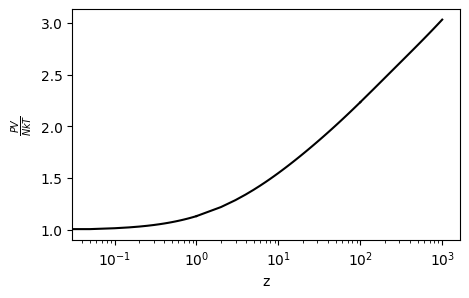

In [3]:
plt.figure(figsize=(5,3))
N=20
y=np.zeros(N+1)
y[0]=1
y[1:]=f52_small_z[1:]/f32_small_z[1:]
plt.semilogx(z_small,y,'-k')
y=f52_med_z/f32_med_z
plt.semilogx(z_med,y,'-k')
y=f52_large_z/f32_large_z
plt.semilogx(z_large,y,'-k')
plt.ylabel(r"$\frac{PV}{NkT}$")
plt.xlabel("z")
plt.show()

As $z$ increases from 0, the equation of state deviates from the classical one.  The deviation becomes quite large as $z$ increases beyond 10.  This indicates that the ideal fermi gas is almost classical for $z < 1$ (high temperature) and quantum contribution rapidly increases for $z>10$ (low temperature).

### $f_{1/2}$

Now we turn to $f_{1/2}(z)$. The integral is now

$$
f_{1/2}(z) = \frac{z}{\sqrt{\pi}} \int_0^\infty \frac{1}{\sqrt{x} (1+z e^{-x})} e^{-x}\, dx
$$

which has an integrable singularity at $x=0$. While the Gauss-Laguerre quadrature does not evaluate the integrand at $x=0$, the rapid change of the integrand near $x=0$ still causes some numerical error.  As we discussed in Section xxx, we can extract the singularity and compute the remaining part numerically.

$$
\begin{eqnarray}
f_{1/2}(z) &=& \frac{z}{\sqrt{\pi}} \int_0^\infty \left[\frac{1}{\sqrt{x} (1+z e^{-x})}-\frac{1}{\sqrt{x}(1+z)}\right] e^{-x}\, dx + \frac{z}{(1+z)\sqrt{\pi}}  \int_0^\infty  \frac{e^{-x}}{\sqrt{x}}\, dx \\
&=&  \frac{z}{1+z} \int_0^\infty \frac{z}{\sqrt{\pi}} \left[ \frac{1-e^{-x}}{\sqrt{x}(1+ze^{-x})}\right] e^{-x}\, dx + \frac{z}{(1+z)}
\end{eqnarray}
$$

where we have used $\int_0^\infty \frac{e^{-x}}{\sqrt{x}}\, dx = \sqrt{\pi}$. Notice that there is no singularity at $x=0$ in the final expression of the integral.  Now, we can evaluate it using the Gauss-Laguerre quadrature.  In addition to 

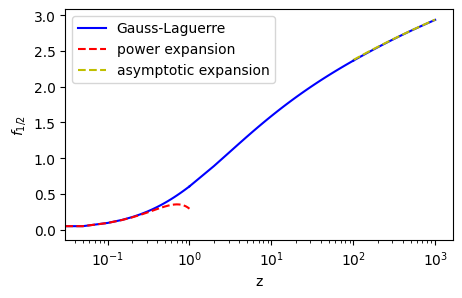

In [4]:
import numpy as np

# Generate abscissas and weights
from sympy import symbols, poly, laguerre

# 10 points Gauss-Laguerre
NG = 10

x = symbols("x")
roots = poly(laguerre(NG, x)).all_roots()

# abscissas and weights are saved as numpy ndarray
x = np.array([r.evalf(20) for r in roots],dtype=float)
w = np.array([(r / ((NG + 1) * laguerre(NG + 1, r)) ** 2).evalf(20)\
              for r in roots],dtype=float)

nu12=1./2.

# For 0 < z < 1
N=20
z_small=np.linspace(0,1.0,N+1)


from scipy.special import gamma 

f12_small_z = np.zeros(N+1)

# no need to compute for z=0.
f12_small_z[0]=0

for k in range(1,N+1):
    g=(w/np.sqrt(x)*(1.0-np.exp(-x))/(1.0+z_small[k]*np.exp(-x))).sum()
    f12_small_z[k]=(g*z_small[k]/gamma(nu12)+1.0)\
        *z_small[k]/(1.0+z_small[k])
    
f12_ps = z_small - z_small**2/2**nu12

# For 1000 > z > 100
N=20
z_large=np.linspace(100,1000,N+1)

f12_large_z=np.zeros(N+1)

for k in range(0,N+1):
    g=(w/np.sqrt(x)*(1.0-np.exp(-x))/(1.0+z_large[k]*np.exp(-x))).sum()
    f12_large_z[k]=(g*z_large[k]/gamma(nu12)+1.0)\
        *z_large[k]/(1.0+z_large[k])

xi = np.log(z_large)
f12_as = xi**nu12/gamma(nu12+1) * (1 + nu12*(nu12-1) *np.pi**2/6. /xi**2 )

# For 100>z>1

N=100
z_med=np.linspace(1,100,N+1)

f12_med_z=np.zeros(N+1)

for k in range(0,N+1):
    g=(w/np.sqrt(x) * (1/(1+z_med[k]*np.exp(-x)) - 1/(1+z_med[k]))).sum()
    f12_med_z[k]=g * z_med[k]/gamma(nu12) + z_med[k]/(1+z_med[k])

import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))

plt.semilogx(z_small,f12_small_z,"-b",label="Gauss-Laguerre")
plt.semilogx(z_small,f12_ps,"--r",label="power expansion")
plt.semilogx(z_large,f12_large_z,"-b")
plt.semilogx(z_large,f12_as,"--y",label="asymptotic expansion")
plt.semilogx(z_med,f12_med_z,"-b")
plt.legend(loc=0)
plt.ylabel(r"$f_{1/2}$")
plt.xlabel("z")

plt.show()

From the naked eyes, the agreement looks great.  Let's check the degree of the accuracy.

In [5]:
print("at z=0.01")

print("mu=1/2:   Gauss-Lagguerre= {0:15.10e} power series= {1:15.10e}"\
      .format(f12_small_z[1],f12_ps[1]))

print("\n")
print("at z=1")
p=float((1-np.sqrt(2))*zeta(1./2.))
print("mu=1/2:   Gauss-Lagguerre= {0:15.10e} Polyloarithm= {1:15.10e}"\
      .format(f12_small_z[20],p))

print("\n")
print("at z=1000")
print("mu=1/2:   Gauss-Lagguerre= {0:15.10e} asymptotic = {1:15.10e}"\
      .format(f12_large_z[20],f12_as[20]))


at z=0.01
mu=1/2:   Gauss-Lagguerre= 4.8305769676e-02 power series= 4.8232233047e-02


at z=1
mu=1/2:   Gauss-Lagguerre= 6.0535913175e-01 Polyloarithm= 6.0489864342e-01


at z=1000
mu=1/2:   Gauss-Lagguerre= 2.9367257008e+00 asymptotic = 2.9401161642e+00


Again we have two digits of accuracy.  This is quite satisfactry.

Finally, we plot the deviation of heat capacity from the classical limit $C_V = \frac{3}{2} k$.

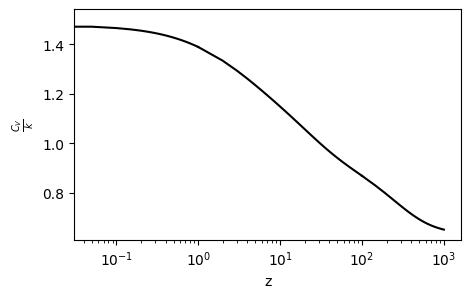

In [6]:
c_small_z = np.zeros(21)
c_small_z[0] = 3./2.
c_small_z[1:] = 15./4.* f52_small_z[1:]/f32_small_z[1:] \
    - 9./4. * f32_small_z[1:]/f12_small_z[1:]
c_med_z = 15./4.* f52_med_z/f32_med_z - 9./4. * f32_med_z/f12_med_z
c_large_z = 15./4.* f52_large_z/f32_large_z \
    - 9./4. * f32_large_z/f12_large_z

plt.figure(figsize=(5,3))
N=20

plt.semilogx(z_small,c_small_z,'-k')
plt.semilogx(z_med,c_med_z,'-k')
plt.semilogx(z_large,c_large_z,'-k')
plt.ylabel(r"$\frac{C_V}{k}$")
plt.xlabel("z")
plt.show()


It shows that the heat capacity decreases as $z$ increases (temperature decreases) due to quantum effects.

## Thermodynamics of Ideal Bose Gases (homework)

There are similar expressions for an ideal bose gas:

$$
\frac{PV}{kTN} = \frac{g_{5/2}(z)}{g_{3/2}(z)}
$$

$$
\frac{C_V}{N k} = \frac{15}{4} \frac{g_{5/2}(z)}{g_{3/2}(z)} - \frac{9}{4} \frac{g_{3/2}(z)}{g_{1/2}(z)}
$$

where $g_\nu(z)$ is the Bose-Einstein integral defined by

$$
g_\nu(z) = \frac{1}{\Gamma(\nu)} \int_0^\infty \frac{x^{\nu-1}}{z^{-1} e^{x}-1} \, dx = \text{Li}_\nu(z)
$$(eq_BE_integral)

The difference between $f_\nu(z)$ and $g_\nu)z)$ is only the sign in the denominator of the integrand.  However, their properties are quite different.  While the Fermi-Direc integral exits for $0 \le z < \infty,~ \nu > 0$, the Bose-Einstein exists only for $0 \le z < 1,~ \nu > 0$, except that  $z=1$ is allowed for $\nu > 1$. For $z>1$, the integrad has a non-integrable sinularity at $x>0$ and the integral diverges.  Interesting quantum phenomena such as the Bose condensation take place near $z=1$.{cite}`Pathria2021`  Therefore, its numerical evaluation needs some care. While it is an improper integral, the evaluation of $g_{5/2}(z)$ seems no problem since there is no singularlity.  $g_{3/2}$ suffers from an integrable singularity at $x=0$, which can be managable. The evaluation of $g_{2/1}(z)$ near $z=1$ is challenging since it diverges at $z=1$. 

The evaluation of the Bose-Einstein integral used to be a major issue. Various approximations and numerical methods were invented. However, since the intergal is equivalent to the polylogarithm function for which a reliable canned routine is available, we don't have to evaluate the integral in the real practice any more.  Nevertheless, it is a good exercise of numerical integration. I leave it for your homework.


___

Updated on 4/16/2024 by R. Kawai